## 1. dataset load

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print(df.shape)
df.head()

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


<AxesSubplot:>

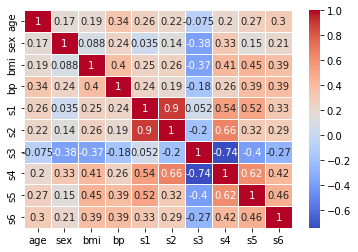

In [2]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [3]:
# data & target

x_data = diabetes.data
y_data = diabetes.target

print(x_data.shape)
print(y_data.shape)

(442, 10)
(442,)


In [4]:
# s3 컬럼 삭제
x_data_mod = np.delete(x_data, 7, axis=1)

In [5]:
# y scaling (-0.2 < x < 0.2, 25 < y < 346)

y_data = y_data/346

In [6]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## 2. 모델 준비

In [7]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## 3. 손실함수

In [8]:
# MSE

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
    
# Loss function

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## 4. gradient 함수

In [9]:
# 기울기 함수 

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## 5. 모델 학습

In [10]:
# 하이퍼 파라미터 설정

LEARNING_RATE = 0.0001

# 모델 학습

losses = []

for i in range(1, 16151):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 50 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 50 : Loss 0.1707
Iteration 100 : Loss 0.1682
Iteration 150 : Loss 0.1657
Iteration 200 : Loss 0.1632
Iteration 250 : Loss 0.1608
Iteration 300 : Loss 0.1585
Iteration 350 : Loss 0.1562
Iteration 400 : Loss 0.1539
Iteration 450 : Loss 0.1517
Iteration 500 : Loss 0.1495
Iteration 550 : Loss 0.1474
Iteration 600 : Loss 0.1453
Iteration 650 : Loss 0.1433
Iteration 700 : Loss 0.1413
Iteration 750 : Loss 0.1393
Iteration 800 : Loss 0.1374
Iteration 850 : Loss 0.1355
Iteration 900 : Loss 0.1336
Iteration 950 : Loss 0.1318
Iteration 1000 : Loss 0.1300
Iteration 1050 : Loss 0.1283
Iteration 1100 : Loss 0.1266
Iteration 1150 : Loss 0.1249
Iteration 1200 : Loss 0.1232
Iteration 1250 : Loss 0.1216
Iteration 1300 : Loss 0.1201
Iteration 1350 : Loss 0.1185
Iteration 1400 : Loss 0.1170
Iteration 1450 : Loss 0.1155
Iteration 1500 : Loss 0.1141
Iteration 1550 : Loss 0.1126
Iteration 1600 : Loss 0.1112
Iteration 1650 : Loss 0.1099
Iteration 1700 : Loss 0.1085
Iteration 1750 : Loss 0.1072
Itera

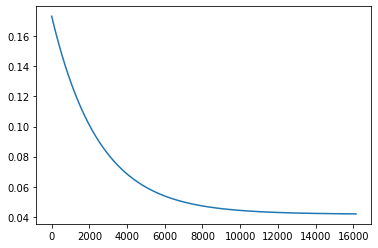

In [11]:
# 시각화

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [12]:
# W, b 확인

W, b

(array([0.71461016, 0.50173842, 0.5388592 , 0.67875496, 0.43922389,
        0.96664012, 0.68764514, 0.31802424, 0.85565379, 0.11008596]),
 0.42748392507407384)

## 6. Test 성능

In [13]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.03573974753847161

## 7. 예측 결과 시각화

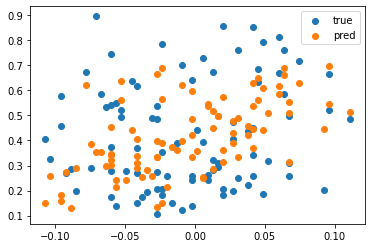

In [14]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()